# 2.1 k-means: a first version:

In [22]:
from sklearn.datasets import load_iris
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def getNewClusterForPoint(point,clusters): 
    listOfCLusters=[]
    for clt in clusters:
        listOfCLusters.append(clt.centroid)
    return clusters[spatial.KDTree(np.array(listOfCLusters)).query(point)[1]] 

def mykmeans(dataPoints,maxClusterNumbers,maxIter=100,kmtype="plane"):   
    random_seed = 10312003
    rng = np.random.RandomState(random_seed)
    permutation = rng.permutation(len(dataPoints))
    dataPoints = dataPoints[permutation] 
    data = generateStartingCentroid(dataPoints,maxClusterNumbers,kmeansTypy=kmtype)
    centroids=data[0:maxClusterNumbers]
    clusters = [Cluster(point,[point]) for point in centroids] 
    for nIter in range(maxIter):
    #To exclude the three centroids that were randomly selected from the data    
        allThePoints = data[maxClusterNumbers:] if nIter==0 else data 
        for cl in clusters:   
            cl.pointInCluster=[]# Erase all the point in the cluster before starting with the new iteration
        for point in allThePoints:
            newCluster=getNewClusterForPoint(point,clusters)
            newCluster.pointInCluster.append(point) 
        for cl in clusters:
            #If in the cluster there is at list one point:
            if len(cl.pointInCluster)!=0:
                #New centroid placed on the average of the points in the cluster
                newCentroid=np.mean(np.array(cl.pointInCluster),axis=0)
                cl.centroid=newCentroid
    for cl in clusters:
        print "cluster: ", cl.centroid,"contains: ",len(cl.pointInCluster),"points"
    plotClusters(clusters) 

class Cluster:
    centroid=[]
    pointInCluster=[]
    def __init__(self,centroid,pointInCluster):
        self.centroid=centroid
        self.pointInCluster=pointInCluster
    def getDistanceFromCentroid(self,point):
        return np.linalg.norm(self.centroid-point)

def plotClusters(clusters):
    #colors = "bgrcmykw"
    for i in range(len(clusters)):
        iCluster= np.array(clusters[i].pointInCluster)
        #plt.scatter(iCluster[:,0], iCluster[:,1],c=np.random.rand(3,1))
        plt.scatter(iCluster[:,0], iCluster[:,1],c=np.random.rand(3,1))
        centroid=clusters[i].centroid
        plt.scatter(centroid[0], centroid[1],c="gold")
    plt.show()
    
#Given a list of centroids and a point, return the closer centroid from this point 
def getCloserCentroid(point,centroids): 
    return centroids[spatial.KDTree(np.array(centroids)).query(point)[1]] 

def generateStartingCentroid(dataPoints,maxClusternumbers,kmeansTypy="plane"):
    if kmeansTypy == "plane":
        return dataPoints

cluster:  [ 6.85384615  3.07692308  5.71538462  2.05384615] contains:  39 points
cluster:  [ 5.88360656  2.74098361  4.38852459  1.43442623] contains:  61 points
cluster:  [ 5.006  3.418  1.464  0.244] contains:  50 points


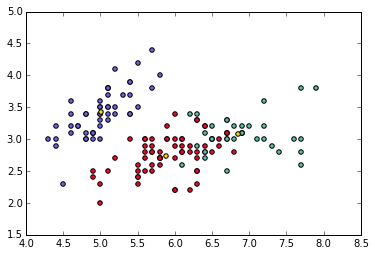

In [26]:
iris = load_iris()
data=iris.data
mykmeans(data,maxClusterNumbers=3,kmtype="plane")  

What happens when k is large?
When the number of clusters grow, we have more centroid and less points for each cluster. For k=150 more or less all the points would be centroid of its own cluster. For k=100 half of the centroid will have another point in their cluster and another half will be alone in thei cluster. As follow:

cluster:  [ 6.1  2.8  4.7  1.2] contains:  1 points
cluster:  [ 6.   2.9  4.5  1.5] contains:  1 points
cluster:  [ 5.    3.25  1.3   0.2 ] contains:  2 points
cluster:  [ 5.8  4.   1.2  0.2] contains:  1 points
cluster:  [ 5.   3.5  1.6  0.6] contains:  1 points
cluster:  [ 6.5  2.8  4.6  1.5] contains:  1 points
cluster:  [ 6.6  3.   4.4  1.4] contains:  1 points
cluster:  [ 5.6   4.3   1.45  0.3 ] contains:  2 points
cluster:  [ 5.4  3.9  1.7  0.4] contains:  1 points
cluster:  [ 6.2  2.2  4.5  1.5] contains:  1 points
cluster:  [ 7.7  2.6  6.9  2.3] contains:  1 points
cluster:  [ 5.6  2.5  3.6  1. ] contains:  2 points
cluster:  [ 6.3  3.3  4.7  1.6] contains:  1 points
cluster:  [ 6.4  2.8  5.6  2.1] contains:  1 points
cluster:  [ 6.3  3.3  6.   2.5] contains:  1 points
cluster:  [ 5.65  2.75  4.15  1.3 ] contains:  2 points
cluster:  [ 5.   2.   3.5  1. ] contains:  1 points
cluster:  [ 6.3  2.5  4.9  1.5] contains:  1 points
cluster:  [ 5.7  2.5  5.   2. ] contains:  1 points


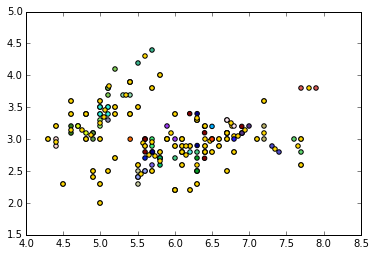

In [71]:
mykmeans(data,maxClusterNumbers=100,kmtype="plane") 

# 2.2 k-means++

In [80]:
def getNewClusterForPoint(point,clusters): 
    listOfCLusters=[]
    for clt in clusters:
        listOfCLusters.append(clt.centroid)
    return clusters[spatial.KDTree(np.array(listOfCLusters)).query(point)[1]] 
    
def mykmeansMulti(dataPoints,maxClusterNumbers,maxIter=100,numberOfLoop=20):   
    random_seed = 10312004
    rng = np.random.RandomState(random_seed)
    permutation = rng.permutation(len(dataPoints))
    dataPoints = dataPoints[permutation] 
    bestPerformingDistortion = np.zeros(maxIter)
    for i in range(numberOfLoop):
        data=np.roll(dataPoints, i+maxClusterNumbers, axis=0)    
        data = generateStartingCentroid(data,maxClusterNumbers,"plane")
        centroids=data[0:maxClusterNumbers]
        clusters = [Cluster(point,[point]) for point in centroids]       
        distortionInIterations = np.zeros(maxIter)
        clustersInIterations = []
        for nIter in range(maxIter):
        #To exclude the three centroids that were randomly selected from the data    
            allThePoints = data[maxClusterNumbers:] if nIter==0 else data 
            for cl in clusters:   
                cl.pointInCluster=[]# Erase all the point in the cluster before starting with the new iteration
            for point in allThePoints:
                newCluster=getNewClusterForPoint(point,clusters)
                newCluster.pointInCluster.append(point)             
            storedInfoOfClusters = []
            for cl in clusters:         
                storedInfoOfClusters.append(Cluster(cl.centroid,cl.pointInCluster))
                #If in the cluster there is at list one point:
                if len(cl.pointInCluster)!=0:
                    #New centroid placed on the average of the points in the cluster
                    newCentroid=np.mean(np.array(cl.pointInCluster),axis=0)
                    cl.centroid=newCentroid
            #To plot the distortion curve for the best performing set of initial poinst:
            distortion = 0         
            #Calculate distortion for each iteration
            for cl in clusters:   
                distortion = distortion + cl.computeClusterDistortion()
            distortionInIterations[nIter]=distortion 
            clustersInIterations.append(np.array(storedInfoOfClusters))
        #To pick the information of the best performing clusters:       
        if i==0:
            bestPerformingDistortion = distortionInIterations[:]
            bestPerformingClusters   = np.array(clustersInIterations)
        elif distortionInIterations[-1]<bestPerformingDistortion[-1]:
            bestPerformingDistortion = distortionInIterations[:]
            bestPerformingClusters   = np.array(clustersInIterations)
     
    #To plot the best performance cluster with the trajectory of the centroid:                   
    for ncl in range(maxClusterNumbers):
        x=[]
        y=[]
        clusterColor=np.random.rand(3,1)
        for cl in bestPerformingClusters[:,ncl]:#Pick one centroid and look at the trajectory
            x.append(cl.centroid[0])
            y.append(cl.centroid[1])           
        plt.plot(x,y,c=clusterColor)
        #print "All the point in cluster:",ncl,": ", bestPerformingClusters[-1][ncl].pointInCluster  
        pointInOneCluster= np.array(bestPerformingClusters[-1][ncl].pointInCluster)
        plt.scatter(pointInOneCluster[:,0],pointInOneCluster[:,1],c=clusterColor)    
    plt.show()
    
    plt.clf()
    plt.scatter(range(maxIter),bestPerformingDistortion)
    plt.xlim(0.,100)
    plt.show()
    
class Cluster:
    centroid=[]
    pointInCluster=[]
    
    def __init__(self,centroid,pointInCluster):
        self.centroid=centroid
        self.pointInCluster=pointInCluster
    
    def getDistanceFromCentroid(self,point):
        return np.linalg.norm(self.centroid-point)
    
    def computeClusterDistortion(self):
        clusterDistortion=0
        for point in np.array(self.pointInCluster):
            clusterDistortion = clusterDistortion + np.linalg.norm(point-self.centroid)
        return  clusterDistortion

def plotClusters(clusters):
    for i in range(len(clusters)):
        iCluster= np.array(clusters[i].pointInCluster)
        plt.scatter(iCluster[:,0], iCluster[:,1],c=np.random.rand(3,1))
        centroid=clusters[i].centroid
        plt.scatter(centroid[0], centroid[1],c="gold")
    plt.show()
    
def generateStartingCentroid(dataPoints,maxClusternumbers,kmeansTypy):
    if kmeansTypy == "plane":
        return dataPoints
    elif kmeansTypy == "plus":
        centroids = []
        centroids.append(dataPoints[0])
        for i in range(maxClusternumbers-1):
            distList=[]
            for point in dataPoints[i+1:]:
                dist = np.linalg.norm(point-getCloserCentroid(point,centroids))
                distList.append(dist)
            weightProb=distList/sum(distList)
            indexes=range(len(dataPoints[i+1:]))
            index= np.random.choice(indexes, p=weightProb)
            centroids.append(dataPoints[index])
            dataPoints = np.concatenate((dataPoints[index:index+1],dataPoints[:index],dataPoints[index+1:]),axis=0)
        return dataPoints
#Given a list of centroids and a point, return the closer centroid from this point 
def getCloserCentroid(point,centroids): 
    return centroids[spatial.KDTree(np.array(centroids)).query(point)[1]] 

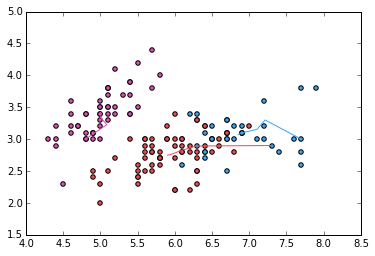

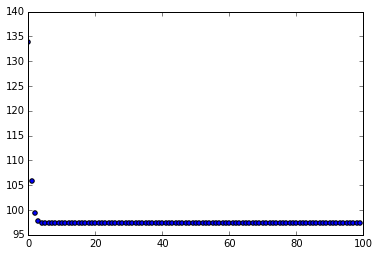

In [81]:
mykmeansMulti(data,maxClusterNumbers=3)  

The distortion goes to...

# 2.3 k-means++

In [82]:
def mykmeansplus(dataPoints,maxClusterNumbers,maxIter=100,numberOfLoop=20):   
    random_seed = 10312004
    rng = np.random.RandomState(random_seed)
    permutation = rng.permutation(len(dataPoints))
    dataPoints = dataPoints[permutation] 
    bestPerformingDistortion = np.zeros(maxIter)
    for i in range(numberOfLoop):
        data=np.roll(dataPoints, i+maxClusterNumbers, axis=0)    
        data = generateStartingCentroid(data,maxClusterNumbers,"plus")
        centroids=data[0:maxClusterNumbers]
        clusters = [Cluster(point,[point]) for point in centroids]       
        distortionInIterations = np.zeros(maxIter)
        clustersInIterations = []
        for nIter in range(maxIter):
        #To exclude the three centroids that were randomly selected from the data    
            allThePoints = data[maxClusterNumbers:] if nIter==0 else data 
            for cl in clusters:   
                cl.pointInCluster=[]# Erase all the point in the cluster before starting with the new iteration
            for point in allThePoints:
                newCluster=getNewClusterForPoint(point,clusters)
                newCluster.pointInCluster.append(point)             
            storedInfoOfClusters = []
            for cl in clusters:         
                storedInfoOfClusters.append(Cluster(cl.centroid,cl.pointInCluster))
                #If in the cluster there is at list one point:
                if len(cl.pointInCluster)!=0:
                    #New centroid placed on the average of the points in the cluster
                    newCentroid=np.mean(np.array(cl.pointInCluster),axis=0)
                    cl.centroid=newCentroid
            #To plot the distortion curve for the best performing set of initial poinst:
            distortion = 0         
            #Calculate distortion for each iteration
            for cl in clusters:   
                distortion = distortion + cl.computeClusterDistortion()
            distortionInIterations[nIter]=distortion 
            clustersInIterations.append(np.array(storedInfoOfClusters))
        #To pick the information of the best performing clusters:       
        if i==0:
            bestPerformingDistortion = distortionInIterations[:]
            bestPerformingClusters   = np.array(clustersInIterations)
        elif distortionInIterations[-1]<bestPerformingDistortion[-1]:
            bestPerformingDistortion = distortionInIterations[:]
            bestPerformingClusters   = np.array(clustersInIterations)
     
    #To plot the best performance cluster with the trajectory of the centroid:                   
    for ncl in range(maxClusterNumbers):
        x=[]
        y=[]
        clusterColor=np.random.rand(3,1)
        for cl in bestPerformingClusters[:,ncl]:#Pick one centroid and look at the trajectory
            x.append(cl.centroid[0])
            y.append(cl.centroid[1])           
        plt.plot(x,y,c=clusterColor)
        #print "All the point in cluster:",ncl,": ", bestPerformingClusters[-1][ncl].pointInCluster  
        pointInOneCluster= np.array(bestPerformingClusters[-1][ncl].pointInCluster)
        plt.scatter(pointInOneCluster[:,0],pointInOneCluster[:,1],c=clusterColor)    
    plt.show()
    
    plt.clf()
    plt.scatter(range(maxIter),bestPerformingDistortion)
    plt.xlim(0.,100)
    plt.show()

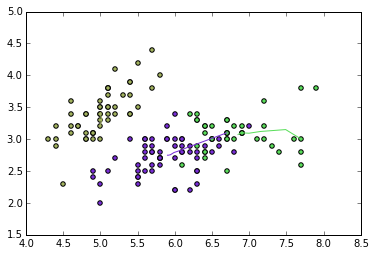

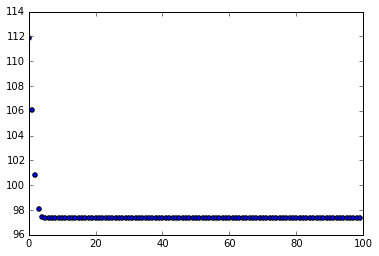

In [83]:
mykmeansplus(data,maxClusterNumbers=3)  

In this version the trajectories of the centroids are sometimes shorter than the one in the previous version. But not always. Often the trajectory seams more or less the same.
The distortion stabilize to a value that is often comparable with the one of the previous version.

# 2.4 Reading Scikit-Learn 
Comparing the time of performance of this mykmeans function with the scikit learn KMeans one (using Python Profilers), I noticed that it is considerably slower. (times around 1 second compared to 0.028 of the Scikit-Learn).
With the profiling I notice that much of the time is wasted because of this statement:

spatial.KDTree(np.array(listOfCLusters)).query(point)[1] 

that given the centroids in listOfCLusters and a point in the dataset, returns the closest cluster for that point.

Reading the KMeans function of Scikit-Learn I found that they use a function written in cython to perform this task. So, even for sure the way I used to implement this stask is emprovable, still this is probably something that in python is very expensive to do. 

# 3.1 Bag-of-words: the original

In [84]:
movie_reviews_data_folder = sys.argv[1]
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))
docs_train, docs_test, y_train, y_test = train_test_split(
     dataset.data, dataset.target, test_size=0.25, random_state=None)

pipeline = Pipeline([
     ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
     ('clf', LinearSVC(C=1000)),
 ])

parameters = {
     'vect__ngram_range': [(1, 1), (1, 2)],
 }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

print(grid_search.grid_scores_)

y_predicted = grid_search.predict(docs_test)

print(metrics.classification_report(y_test, y_predicted,
                                     target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
plt.matshow(cm)
plt.show()


NameError: name 'sys' is not defined